In [7]:
import pandas as pd
# from imutils import face_utils
import numpy as np
# import argparse
# import imutils
import dlib
from matplotlib import pyplot as plt
import cv2
# import skvideo
# skvideo.setFFmpegPath("C:\\Users\\lak50\\Desktop\\test\\ffmpeg")
import skvideo.io
import matplotlib as mpl           # 그래프를 그리는 패키지

## 참고용

In [1]:
conda install -c menpo ffmpeg

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
## face detector와 landmark predictor 정의
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

## 비디오 읽어오기
cap = skvideo.io.vreader('test.mp4')

count = 0
df_x_test = pd.DataFrame()
df_y_test = pd.DataFrame()
## 각 frame마다 얼굴 찾고, landmark 찍기
for frame in cap:    
    ## RGB에서 BGR로 바꾸기 
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    ## resize할 비율 구하기
    r = 300. / img.shape[1]
    dim = (300, int(img.shape[0] * r))

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    ## 얼굴 detection
    rects = detector(resized, 1)
    for i, rect in enumerate(rects):
        
        ## 찾은 얼굴의 박스좌표
        l = rect.left()
        t = rect.top()
        b = rect.bottom()
        r = rect.right()

        ## facial landmark 찾기
        shape = predictor(resized, rect)
        ## facial landmark를 빨간색 점으로 찍어서 표현
        x_list = []
        y_list = []
        for j in range(68):
            x, y = shape.part(j).x, shape.part(j).y
            cv2.circle(resized, (x, y), 1, (0, 0, 255), -1)
            x_list.append(x)
            y_list.append(y)
            cv2.rectangle(resized, (l, t), (r, b), (0, 255, 0), 2)
            result = cv2.putText(resized, str(j), (x, y), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.3, (0, 255, 0))
        ## 얼굴이 있는 부분을 박스쳐주기
        count += 1
        df_x['face' + str(count)] = x_list
        df_y['face' + str(count)] = y_list
        # cv2.imwrite('test_folder\\img' + str(count) + '.png', result)
        ## 처리된 이미지 보여주기
        # cv2.imshow('frame', resized)
        # count += 1
        # cv2.imwrite('C:\\Users\\lak50\\Desktop\\test\\test_folder\\img' + str(count) + '.png',result)
        # # plt.imshow(final)
        # # plt.title('my picture')
        # # plt.show()
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\lak50\AppData\Local\Temp\ipykernel_17648\2716140585.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x['face' + str(count)] = x_list
C:\Users\lak50\AppData\Local\Temp\ipykernel_17648\2716140585.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_y['face' + str(count)] = y_list
C:\Users\lak50\AppData\Local\Temp\ipykernel_17648\2716140585.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [14]:
display(df_y)

,face1,face2,face3,face4,face5,face6,face7,face8,face9,face10,...,face1160,face1161,face1162,face1163,face1164,face1165,face1166,face1167,face1168,face1169
0,131,131,131,126,107,142,149,140,123,136,...,124,125,125,124,124,125,124,125,124,125
1,143,143,143,138,124,160,165,157,139,151,...,141,142,143,141,142,142,141,142,141,142
2,156,156,156,152,142,177,182,174,154,166,...,159,159,160,158,159,159,158,159,158,159
3,170,170,170,166,160,193,197,192,172,182,...,175,176,176,175,175,175,174,175,174,175
4,185,185,185,182,178,209,211,208,189,198,...,190,191,191,190,190,190,190,191,189,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,194,194,194,194,193,192,189,192,206,209,...,194,194,194,194,194,194,194,194,194,194
64,198,198,198,199,198,194,192,192,211,211,...,192,193,193,193,193,193,193,193,193,193
65,198,198,199,199,197,196,196,197,207,210,...,196,196,196,196,196,196,196,196,196,196
66,198,198,198,198,196,197,197,199,204,210,...,197,197,197,197,197,197,197,197,197,197


<AxesSubplot:>

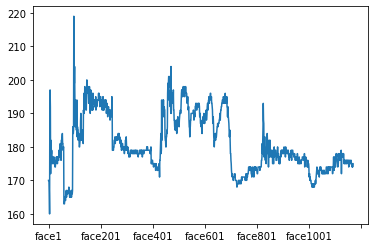

In [20]:
df_y.iloc[3].plot()